In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


####Demonstrate using the simulator for a surface simulation, stohastic  integration.

``Run time``: approximately 30 seconds (workstation circa 2010).

``Memory requirement``: < 1 GB

In [19]:
from tvb.datatypes.cortex import Cortex

from tvb.simulator.lab import *

####Perform the simulation 

In [20]:
#Initialise a Model, Coupling, and Connectivity.
g2d = models.Generic2dOscillator()
white_matter = connectivity.Connectivity(load_default=True)
white_matter.speed = numpy.array([4.0])

white_matter_coupling = coupling.Linear(a=0.0043)   # 0.0066

In [21]:
#Initialise an Integrator
hiss = noise.Additive(nsig=numpy.array([2 ** -16, ]))
heunint = integrators.HeunStochastic(dt=2 ** -4, noise=hiss)

In [22]:
#Initialise a surface fully loaded
default_cortex = Cortex(load_default=True)

In [23]:
# load the default region mapping
rm = region_mapping.RegionMapping(load_default=True)
#Initialise some Monitors with period in physical time
mon_tavg = monitors.TemporalAverage(period=2 ** -2)
mon_savg = monitors.SpatialAverage(period=2 ** -2)
mon_eeg = monitors.EEG(load_default=True, region_mapping=rm, period=2 ** -2) 
#Bundle them
what_to_watch = (mon_tavg, mon_savg, mon_eeg)

In [24]:
#Initialise Simulator -- Model, Connectivity, Integrator, Monitors, and surface.
sim = simulator.Simulator(model=g2d, connectivity=white_matter,
                          coupling=white_matter_coupling,
                          integrator=heunint, monitors=what_to_watch,
                          surface=default_cortex)

sim.configure()

Simulator(bound=False, value=None)

In [25]:
#Clear initial transient
LOG.info("Initial run to clear transient...")
for _, _, _ in sim(simulation_length=2 ** 6):
    pass
LOG.info("Finished initial run to clear transient.")


In [26]:
#Perform the simulation
tavg_data = []
tavg_time = []
savg_data = []
savg_time = []
eeg_data = []
eeg_time = []

for tavg, savg, eeg in sim(simulation_length=2 ** 6):
    if not tavg is None:
        tavg_time.append(tavg[0])
        tavg_data.append(tavg[1])

    if not savg is None:
        savg_time.append(savg[0])
        savg_data.append(savg[1])
        
    if not eeg is None:
        eeg_time.append(eeg[0])
        eeg_data.append(eeg[1])

LOG.info("finished simulation")

####Plot pretty pictures of what we just did 

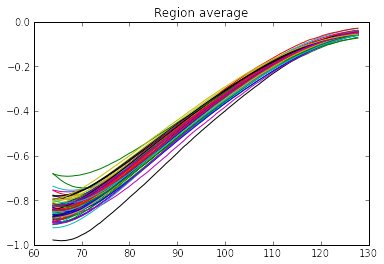

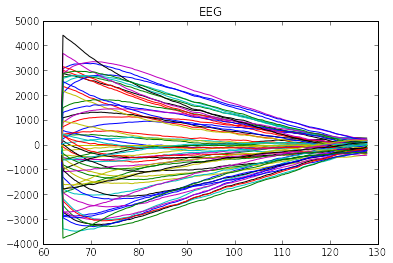

In [27]:
#Make the lists numpy.arrays for easier use.
TAVG = numpy.array(tavg_data)
SAVG = numpy.array(savg_data)
EEG = numpy.array(eeg_data)

#Plot region averaged time series
figure(3)
plot(savg_time, SAVG[:, 0, :, 0])
title("Region average")

#Plot EEG time series
figure(4)
plot(eeg_time, EEG[:, 0, :, 0])
title("EEG")

show()

#Surface movie, requires mayavi.malb
if IMPORTED_MAYAVI:
    from tvb.simulator.plot.tools import mlab
    st = surface_timeseries(sim.surface, TAVG[:, 0, :, 0])
    imshow(mlab.screenshot())